### Thoughts

- In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors
- In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend, and seasonal predictors


- ARIMA stands for AutoRegression Integrated Moving Average
- If we drop the Integrated and Moving Average components, then we're only left with AR
- Let's explore the simplified AR model

### AutoRegression

- In an autoregression model, we forecast using a linear combination of past values of the variable. The term AutoRegression describes a regression of the variable against itself
- An autoregression is a run against a set of lagged values of order p
- The autoregressive model specifies that the output variable depends linearly on it's own previous values and on a stochastic term (an imperfectly predictable term)
- Higher order AR models become mathematically very complex
- Fortunately for us, we can let statsmodels library choose the best order for the model

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [7]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\uspopulation.csv",
                index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

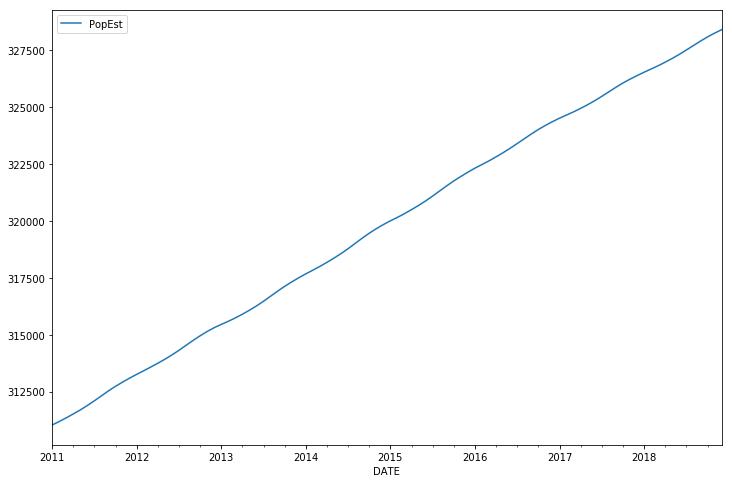

In [9]:
df.plot(figsize=(12, 8))

In [11]:
len(df) - 12

84

In [15]:
train = df.iloc[:84]
test = df.iloc[84:]

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
model = AR(train['PopEst'])

In [20]:
AR1fit = model.fit(maxlag=1)

In [22]:
AR1fit.k_ar

1

In [23]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [24]:
start = len(train)

In [25]:
end = len(train) + len(test) - 1

In [29]:
predictions1 = AR1fit.predict(start=start, end=end)

In [31]:
predictions1 = predictions1.rename('AR(1) Predictions')

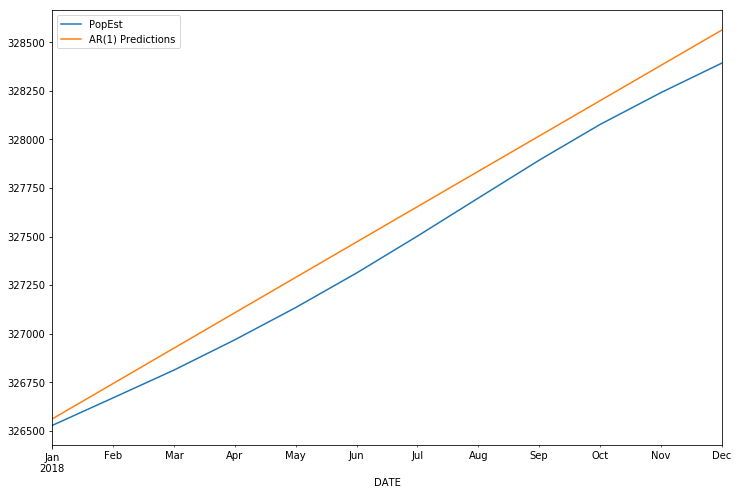

In [36]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)

In [37]:
AR2fit = model.fit(maxlag=2)

In [38]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [39]:
predictions2 = AR2fit.predict(start, end)

In [40]:
predictions2 = predictions2.rename('AR(2) Predictions')

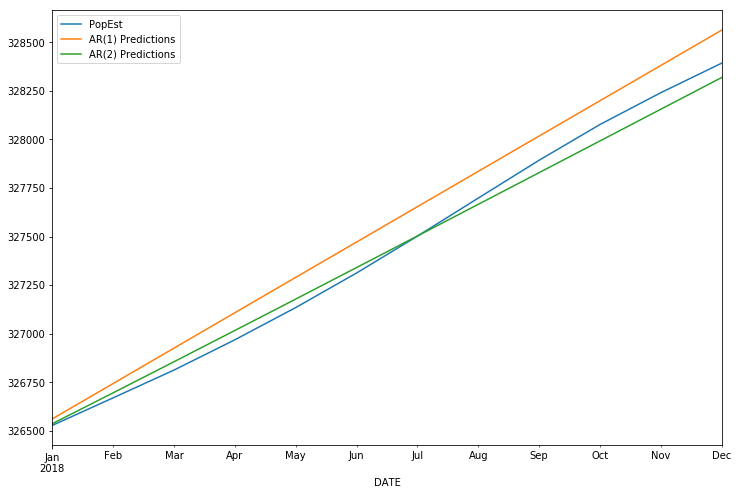

In [41]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

### This is great - but let us let statsmodels decide the optimal p value...

In [44]:
# set criterion for evaluating best model
ARfit = model.fit(ic='t-stat')

In [45]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [48]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
labels = ['AR1', 'AR2', 'AR8']

In [51]:
preds = [predictions1, predictions2, predictions8]

In [54]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714239577344
AR2 MSE was: 2713.258615675103
AR8 MSE was: 186.97058618962419


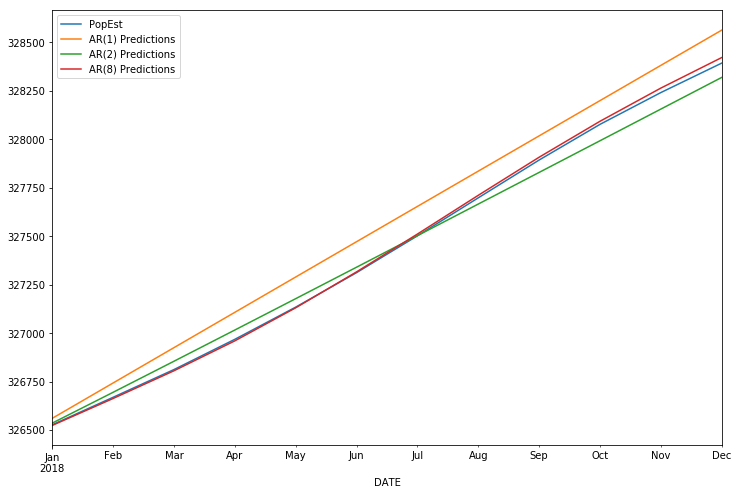

In [55]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

### Lets forecast into the future

In [56]:
model = AR(df['PopEst'])

ARfit = model.fit(ic='t-stat')

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

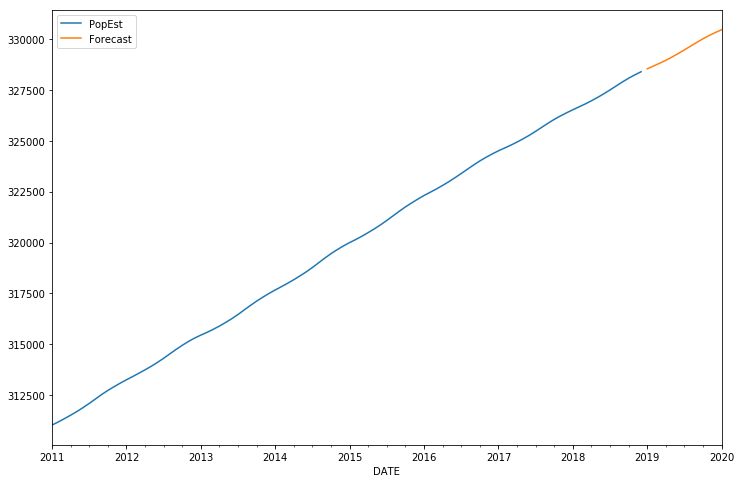

In [58]:
df['PopEst'].plot(figsize=(12,8), legend=True)
forecasted_values.plot(legend=True)